### Importing Libraries

In [1]:
!pip install sidetable

In [2]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import pandasql as psql
sql=psql.sqldf
import numpy as np
sns.set_style("dark")
import sidetable

### Data Importing

In [17]:
df = pd.read_csv('../project8/amazon.csv', encoding='latin1')
df.head(10)

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
5,2003,Acre,Janeiro,10.0,2003-01-01
6,2004,Acre,Janeiro,0.0,2004-01-01
7,2005,Acre,Janeiro,12.0,2005-01-01
8,2006,Acre,Janeiro,4.0,2006-01-01
9,2007,Acre,Janeiro,0.0,2007-01-01


### Checking if there is any empty spaces in data

In [18]:
df.rename(columns={'number':'number_fires'},inplace=True)

colunas=df.columns.to_list()

def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

missing=missing_data(df)


print(colunas)
print(missing)

['year', 'state', 'month', 'number_fires', 'date']
          year   state   month number_fires    date
Total        0       0       0            0       0
Percent      0       0       0            0       0
Types    int64  object  object      float64  object


### Mapping states by region & Ordering the months

In [19]:
df['state'].unique()

state_region={'Acre':'North', 'Alagoas':'Northeast', 'Amapa':'North', 'Amazonas':'North', 'Bahia':'Northeast', 'Ceara':'Northeast',
       'Distrito Federal':'Midwest', 'Espirito Santo':'Southeast', 'Goias':'Midwest', 'Maranhao':'Northeast',
       'Mato Grosso':'Midwest', 'Minas Gerais':'Southeast', 'Pará':'North', 'Paraiba':'Northeast', 'Pernambuco':'Northeast',
       'Piau':'Northeast', 'Rio':'Southeast', 'Rondonia':'North', 'Roraima':'North', 'Santa Catarina':'South',
       'Sao Paulo':'Southeast', 'Sergipe':'Northeast', 'Tocantins':'North'}
df['region']=df['state'].map(state_region)

#Ordering Months
month_order={'Janeiro':'01', 'Fevereiro':'02', 'Março':'03', 'Abril':'04', 'Maio':'05', 'Junho':'06', 'Julho':'07',
       'Agosto':'08', 'Setembro':'09', 'Outubro':'10', 'Novembro':'11', 'Dezembro':'12'}
df['month_order']=df['month'].map(month_order)

### Analysis by region

In [20]:
# Side table
df.stb.freq(['region'], style=True)

,region,count,percent,cumulative_count,cumulative_percent
0,Northeast,"2,152",33.34%,"2,152",33.34%
1,North,"1,673",25.92%,"3,825",59.27%
2,Southeast,"1,434",22.22%,"5,259",81.48%
3,Midwest,956,14.81%,"6,215",96.30%
4,South,239,3.70%,"6,454",100.00%


### Fires by region & state

In [21]:
fires_by_region = sql('''
select region, round(sum(number_fires)) as number_fires, round(avg(number_fires)) as average_fires from df
group by region 
order by number_fires desc
''')

print(fires_by_region)

      region  number_fires  average_fires
0  Northeast      222922.0          104.0
1      North      173836.0          104.0
2  Southeast      140303.0           98.0
3    Midwest      137503.0          144.0
4      South       24360.0          102.0


### Fire distrubution by state & region 

In [24]:
fires_by_region_and_state = sql ('''
select region, state, round(sum(number_fires)) as number_fires from df
group by region, state order by number_fires desc limit 10''')

print(fires_by_region_and_state)

      region         state  number_fires
0    Midwest   Mato Grosso       96246.0
1  Northeast       Paraiba       52436.0
2  Southeast     Sao Paulo       51121.0
3  Southeast           Rio       45161.0
4  Northeast         Bahia       44746.0
5  Northeast          Piau       37804.0
6    Midwest         Goias       37696.0
7  Southeast  Minas Gerais       37475.0
8      North     Tocantins       33708.0
9      North      Amazonas       30650.0


### Fire trends by year & region

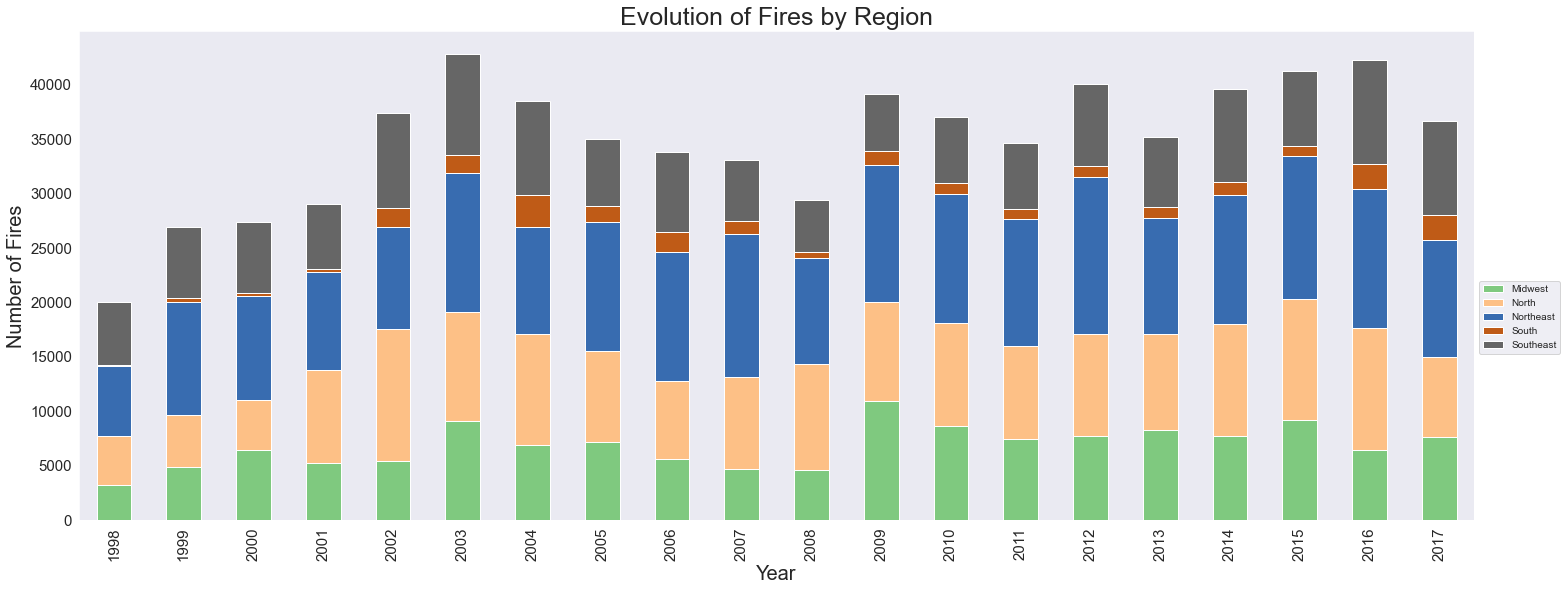

In [25]:
evolutionByRegion = df.groupby(['year', 'region']).sum().sort_values('year', ascending=True).unstack().fillna(0)

evolutionByRegion.plot(kind='bar', stacked=True, figsize=(25,9), colormap='Accent')
plt.title('Evolution of Fires by Region', fontsize = 25)
plt.xlabel('Year', fontsize = 20)
plt.ylabel('Number of Fires', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(['Midwest','North','Northeast','South','Southeast'],bbox_to_anchor=(1, 0.5))

### Fire trend per month

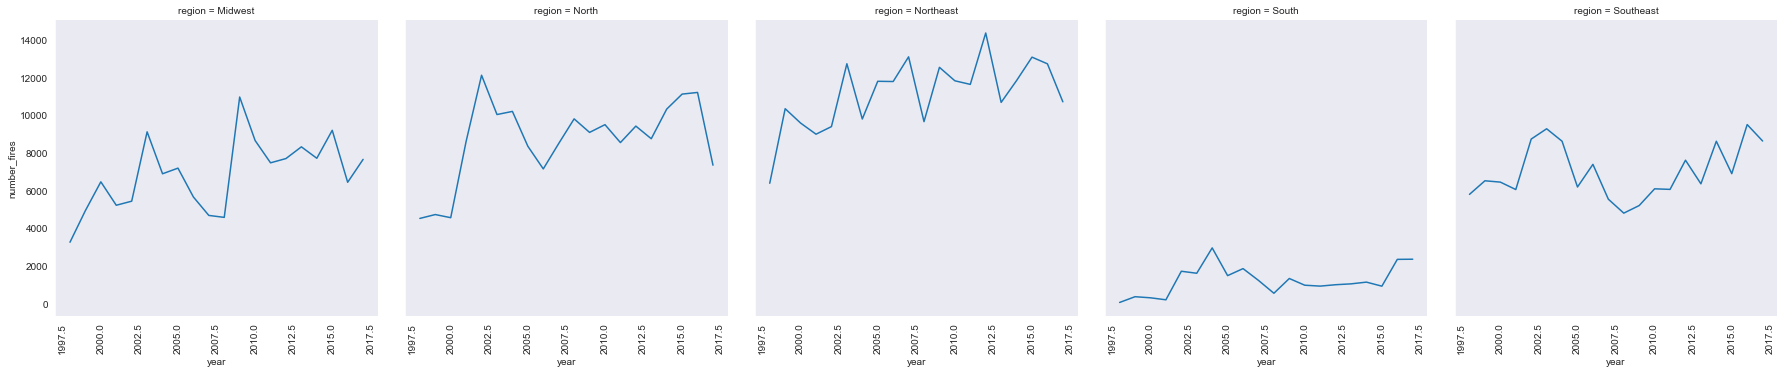

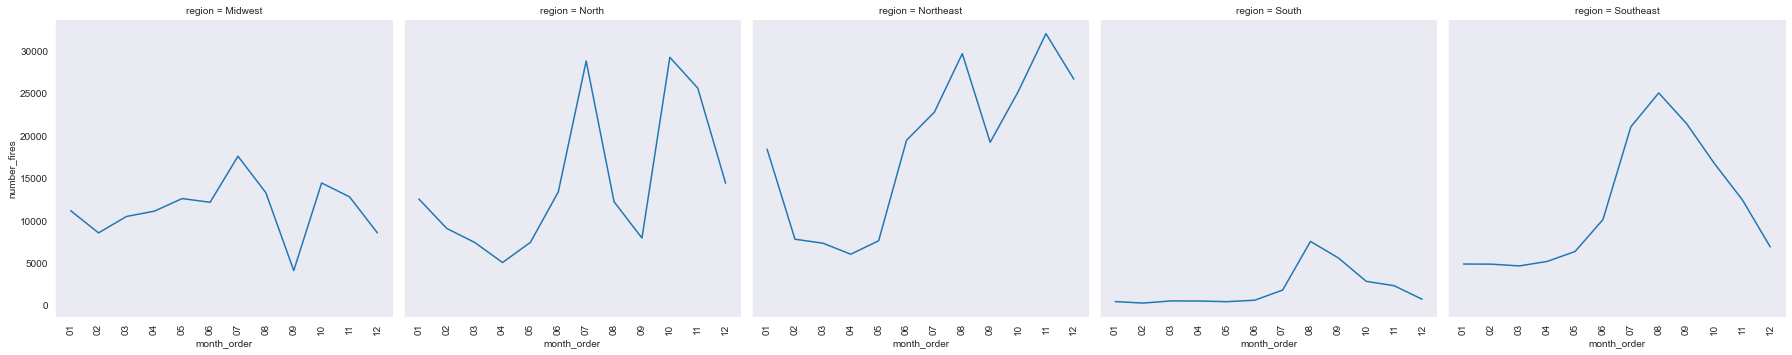

In [31]:
forChartLine = df.groupby(['year', 'region']).sum().sort_values('year', ascending=True).reset_index()

c=sns.relplot(x="year", y="number_fires", col="region", kind="line", data=forChartLine)
c.set_xticklabels(rotation=90)

forChartlineMonth=sql('''select region, month_order, sum(number_fires) as number_fires from df
                      group by region,month_order
                      order by month''')
                      
                                    
g=sns.relplot(x='month_order',y='number_fires',col='region',kind='line',data=forChartlineMonth)
g.set_xticklabels(rotation=90)